<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : 

In [11]:
# Load the libraries

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

In [2]:
!pip install patool

     |████████████████████████████████| 81kB 3.8MB/s 


In [4]:
import patoolib      # For extracting .pkl file 

patoolib.extract_archive("mnist.rar", outdir="/content")

patool: Extracting mnist.rar ...
patool: running /usr/bin/unrar x -- /content/mnist.rar
patool:     with cwd='/content'
patool: ... mnist.rar extracted to `/content'.


'/content'

In [5]:
# Load the data

data = open('mnist.pkl', 'rb')
train, validation, test = pickle.load(data, encoding = 'latin1')

In [47]:
# Splitting input and output variables

X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]
X_val = validation[0]
y_val = validation[1]

In [48]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(50000, 784) (50000,) (10000, 784) (10000,) (10000, 784) (10000,)


In [49]:
# Combining train set and validation set images

X_train = np.concatenate((X_train, X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [76]:
# Define the model

model = Sequential()
model.add(Dense(units = 100, input_shape = (784, ), activation = 'relu'))
model.add(Dense(units = 100, input_shape = (100, ), activation = "relu"))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Train the model

model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4349 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9869


In [78]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)
print("Loss on test data : ", loss_and_metrics[0])
print("Accuracy on test data : ", loss_and_metrics[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9754
Loss on test data :  0.08639276772737503
Accuracy on test data :  0.9753999710083008


In [80]:
classes = model.predict(X_test, batch_size = 32)
y_predicted = []
for i in range(len(classes)):
  y_predicted.append(np.argmax(classes[i]))
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

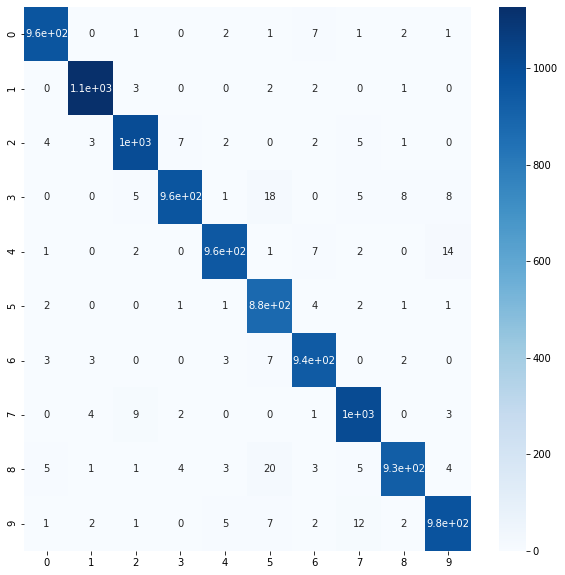

In [86]:
from sklearn import metrics
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
cm = metrics.confusion_matrix(y_true = y_test, y_pred = y_predicted)
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax)